## Some Simple Topic Analysis Network Vis with Python, a Topic GUI (running Mallet), Excel, Gephi

### By Lynn Cherny (@arnicas) (March, 2015) for PyLadies Boston

#### Verify the contents of the data folder we'll be using: 

In [1]:
ls data/mixed_chapters/

austen_pride_ch1.txt          brown_davinci_ch77.txt        grimms_hanselgretel.txt
austen_pride_ch2.txt          brown_davinci_ch92.txt        grimms_snowdrop.txt
austen_pride_ch40.txt         conrad_secret_ch1.txt         grimms_wateroflife.txt
austen_pride_ch50.txt         conrad_secret_ch2.txt         lewis_lionwitch_ch1.txt
austen_sense_ch1.txt          doyle_caseofidentity.txt      lewis_lionwitch_ch12.txt
austen_sense_ch2.txt          doyle_redheadedleague.txt     lewis_lionwitch_ch14.txt
austen_sense_ch27.txt         doyle_scandalbohemia.txt      lewis_lionwitch_ch2.txt
austen_sense_ch41.txt         eliot_middlemarch_ch1.txt     meyer_twilight_ch1.txt
barrie_peterpan_ch1.txt       eliot_middlemarch_ch2.txt     meyer_twilight_ch15.txt
barrie_peterpan_ch15.txt      eliot_middlemarch_ch48.txt    meyer_twilight_ch2.txt
barrie_peterpan_ch2.txt       eliot_middlemarch_ch73.txt    meyer_twilight_ch21.txt
brown_angels_ch1.txt          eljames_fiftyshades_ch1.txt   stevenson_treasure_ch

*Alert: If you're on a Mac, check for a .DS_Store file here and delete it if you can before running the topic modeler.*

The topic tool GUI we will use is available in this repo (and duplicated in my github repo, but it may not run for you without a fresh download, especially on Windows): https://code.google.com/p/topic-modeling-tool/.  This tool runs a GUI wrapper around [mallet](http://mallet.cs.umass.edu/), a state-of-the-art command line tool for topic modeling. After you've done this exercise, you can try running it without the GUI and exploring the other options in that package.

Download it if you don't have it already.  The tool will be called **TopicModelingTool.jar.**

Create a directory for output files, called **topic_output,** for example.  Doubleclick on the jar file to run it. Select the input directory **data/mixed_chapters** and the output directory you created. Click on **Advanced...** and change the settings to match.


#### It should look something like this:
<img src="images/topicModelingTool_advanced.png">

Run it by clicking "Learn Topics." Look at the 2 folders that have appeared in your ouput directory (e.g., topic_output), if this ran correctly:

* output_csv
* output_html

If you want to browse around the output produced in the HTML folder, feel free (click on the _all_topics.html_ file to load it in a browser). **NB: You will probably see slightly different results... LDA training is non-deterministic and the element of randomness may lead to different results.**  But they will probably nevertheless be comparable; I've run several times on this data and gotten similar results each time.

I find the HTML non-visual display kind of confusing. So we're going to make a network diagram instead. In this code, you want to set the path to your output directory for the csv files:


In [140]:
import csv
import collections

DIR = 'topic_output/output_csv/'
topicWords = DIR + 'Topics_Words.csv'
topicDocs = DIR + 'TopicsInDocs.csv'
docsTopics = DIR + 'DocsInTopics.csv'


In [141]:
# pass in the topic_words filename
# This will give you the 10 words per topic; we asked for 10 topics
def list_words_for_topics(filename):
    """ Pass in the Topics_Words csv file."""
    words = {}
    with open(filename, 'rb') as csvfile:
        reader = csv.reader(csvfile, delimiter=',', quotechar='"')
        for index, row in enumerate(reader):
            if index > 0:  # skip first row
                words[row[0]] = [x.strip() for x in row[1].split() if len(x.strip())>0]
                print row
    return words

In [142]:
word_list = list_words_for_topics(topicWords)
len(word_list)  # you will have as many as topics you requested - so, 12.

['1', 'holmes mr man street matter heard business case face red']
['2', 'langdon man felt word gettum sophie religious teabing city curator']
['3', 'didn looked asked edward couldn wasn eyes walked made hair']
['4', 'dorothea celia glass sir made casaubon man brooke snowdrop captain']
['5', 'thought cried hook woman hansel life peter father long children']
['6', 'mr verloc vladimir air sort winnie fact don women business']
['7', 'mr mrs mother elinor sister day thing dashwood bennet half']
['8', 'lucy mr looked light face began aslan peter knew great']
['9', 'time back good door hand room voice ll eyes side']
['10', 'darling mrs night wendy mr father remember mother children nana']
['11', 'make thought mind years young miss life people give place']
['12', 'don eyes grey christian feel head ve steele hands hair']


12

In [143]:
word_list['1'] # listing the words in the topic number

['holmes',
 'mr',
 'man',
 'street',
 'matter',
 'heard',
 'business',
 'case',
 'face',
 'red']

## ALERT:  The topic modeling tool will number the docs from 1, not 0 like python lists. That's why we're making dicts with keys that are strings.  Take this into account when doing mapping/reporting.

#### Let's get the filenames mapped to the document id's which are used in most of these data files. The document filename and id is found in the DocsInTopics.csv.  While we're at it, let's get the authors, too.

In [144]:
def get_names_for_ids(filename):
    """ Pass in the Docs in Topics csv file."""
    doc_titles = {}  # dictionary, the keys will be the doc id, the filename the value
    doc_authors = {}
    with open(filename, 'rb') as csvfile:
        reader = csv.reader(csvfile, delimiter=',', quotechar='"')
        for index, row in enumerate(reader):
            print row
            if index > 0:  # skip first row making the data structure
                title = row[3].split('/')[-1:][0]  # last element of the split
                author = title.split('_')[0]
                id = row[2]
                print "Parsed out ", title, author
                doc_titles[id] = title
                doc_authors[id] = author
    return doc_titles, doc_authors

In [228]:
doc_ids, doc_authors = get_names_for_ids(docsTopics)

['topicId', 'rank', 'docId', 'filename']
['1', '1', '21', '/Users/lynn/Documents/Talks/TopicNetworksPyladies/./data/mixed_chapters/doyle_redheadedleague.txt']
Parsed out  doyle_redheadedleague.txt doyle
['1', '2', '22', '/Users/lynn/Documents/Talks/TopicNetworksPyladies/./data/mixed_chapters/doyle_scandalbohemia.txt']
Parsed out  doyle_scandalbohemia.txt doyle
['1', '3', '20', '/Users/lynn/Documents/Talks/TopicNetworksPyladies/./data/mixed_chapters/doyle_caseofidentity.txt']
Parsed out  doyle_caseofidentity.txt doyle
['1', '4', '19', '/Users/lynn/Documents/Talks/TopicNetworksPyladies/./data/mixed_chapters/conrad_secret_ch2.txt']
Parsed out  conrad_secret_ch2.txt conrad
['1', '5', '23', '/Users/lynn/Documents/Talks/TopicNetworksPyladies/./data/mixed_chapters/eliot_middlemarch_ch1.txt']
Parsed out  eliot_middlemarch_ch1.txt eliot
['1', '6', '18', '/Users/lynn/Documents/Talks/TopicNetworksPyladies/./data/mixed_chapters/conrad_secret_ch1.txt']
Parsed out  conrad_secret_ch1.txt conrad
['1',

In [146]:
doc_ids['1']

'austen_pride_ch1.txt'

*Note here: If you see ".DS_Store" as a document, you need to delete that file from the directory you input to the topic modeling tool GUI and rerun that.*

In [147]:
doc_authors

{'1': 'austen',
 '10': 'barrie',
 '11': 'barrie',
 '12': 'brown',
 '13': 'brown',
 '14': 'brown',
 '15': 'brown',
 '16': 'brown',
 '17': 'brown',
 '18': 'conrad',
 '19': 'conrad',
 '2': 'austen',
 '20': 'doyle',
 '21': 'doyle',
 '22': 'doyle',
 '23': 'eliot',
 '24': 'eliot',
 '25': 'eliot',
 '26': 'eliot',
 '27': 'eljames',
 '28': 'eljames',
 '29': 'eljames',
 '3': 'austen',
 '30': 'eljames',
 '31': 'grimms',
 '32': 'grimms',
 '33': 'grimms',
 '34': 'lewis',
 '35': 'lewis',
 '36': 'lewis',
 '37': 'lewis',
 '38': 'meyer',
 '39': 'meyer',
 '4': 'austen',
 '40': 'meyer',
 '41': 'meyer',
 '42': 'stevenson',
 '43': 'stevenson',
 '5': 'austen',
 '6': 'austen',
 '7': 'austen',
 '8': 'austen',
 '9': 'barrie'}

#### One of the output files, the most useful for network drawing, is in an INSANE format where topic numbers alternate with scores.

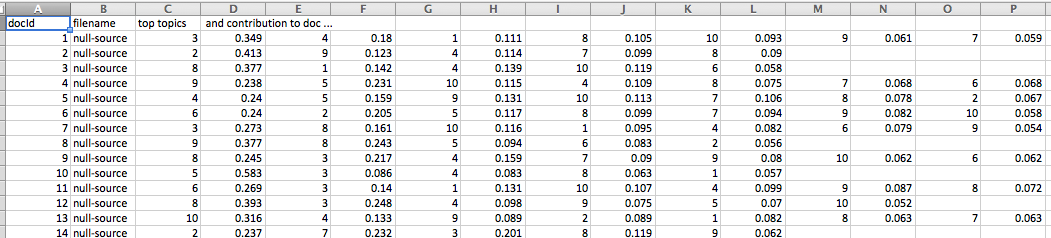

In [148]:
from IPython.core.display import Image
Image(filename="images/TopicsInDocsCSV.png")

**So let's parse it nicely.**

In [231]:
# pass in topic_docs.
# This gets you the topic assigments and strength per document.
def parse_topicsDocs(filename):
    """ Filename input is the TopicsInDocs.csv file path."""
    docs = {}
    with open(filename, "rb") as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='"')
        for index, row in enumerate(spamreader):
            if index > 0:  # skip first row
                print "row", row
                docid = row[0]
                topics = row[2:]
                topics_dict = dict(zip(topics[::2],topics[1::2]))  #alternating
                print docid, topics_dict
                docs[docid] = topics_dict
    return docs

In [232]:
docs_alltopics = parse_topicsDocs(topicDocs)

row ['1', '/Users/lynn/Documents/Talks/TopicNetworksPyladies/./data/mixed_chapters/austen_pride_ch1.txt', '7', '0.524', '11', '0.157', '1', '0.091', '9', '0.067']
1 {'11': '0.157', '1': '0.091', '9': '0.067', '7': '0.524'}
row ['2', '/Users/lynn/Documents/Talks/TopicNetworksPyladies/./data/mixed_chapters/austen_pride_ch2.txt', '7', '0.479', '9', '0.144', '10', '0.117', '11', '0.082']
2 {'9': '0.144', '10': '0.117', '7': '0.479', '11': '0.082'}
row ['3', '/Users/lynn/Documents/Talks/TopicNetworksPyladies/./data/mixed_chapters/austen_pride_ch40.txt', '7', '0.541', '11', '0.206']
3 {'11': '0.206', '7': '0.541'}
row ['4', '/Users/lynn/Documents/Talks/TopicNetworksPyladies/./data/mixed_chapters/austen_pride_ch50.txt', '7', '0.574', '11', '0.168']
4 {'11': '0.168', '7': '0.574'}
row ['5', '/Users/lynn/Documents/Talks/TopicNetworksPyladies/./data/mixed_chapters/austen_sense_ch1.txt', '7', '0.630', '11', '0.141']
5 {'11': '0.141', '7': '0.630'}
row ['6', '/Users/lynn/Documents/Talks/TopicNetwo

#### Check you have the right number of documents in your new dictionary, to match files count (note if you have .DS_Store you will have a mismatch!)

In [150]:
ls data/mixed_chapters | wc -l

      43


In [151]:
# Verify the length of the dict is the number of docs in the data directory
len(docs_alltopics)

43

In [152]:
docs_alltopics['1']  # topics and percent of words assigned to the topic for first doc

{'1': '0.091', '11': '0.157', '7': '0.524', '9': '0.067'}

# Now let's do a simple first visualization of the data in Excel.

In [153]:
# Make a simple csv format we could see in Excel: doc #, topic, strength, title

def doc_topics_for_excel_table(docs_alltopics, doc_ids, doc_authors, filename):
    ''' Produce a csv of docs, topics, scores, and filename.
    
    Args:
        docs_alltopics: the output from read_doctopics
        doc_ids: document ids to filename dict
        filename: to save to
    Output:
        A file we can open in excel
    '''
    with open(filename, "w") as handle:
        print "DocID,Topic,Score,File,Author"  # first row headers for cell below
        
        handle.write("DocID,Topic,Score,File,Author\n")  # the header of the file
        for id, topics in docs_alltopics.iteritems():
            #print x, docs_alltopics[x].keys()
            for topic, score in topics.iteritems():
                #print topic, score
                print ','.join([str(id), "Topic"+str(topic), str(score), doc_ids[id], doc_authors[id]])
                handle.write(','.join([str(id), "Topic"+str(topic), str(score), doc_ids[id], doc_authors[id] + "\n"]))

In [233]:
doc_topics_for_excel_table(docs_alltopics, doc_ids, doc_authors, 'data/for_excel.csv')

DocID,Topic,Score,File,Author
42,Topic9,0.242,stevenson_treasure_ch1.txt,stevenson
42,Topic10,0.106,stevenson_treasure_ch1.txt,stevenson
42,Topic5,0.180,stevenson_treasure_ch1.txt,stevenson
42,Topic4,0.232,stevenson_treasure_ch1.txt,stevenson
42,Topic11,0.070,stevenson_treasure_ch1.txt,stevenson
43,Topic9,0.304,stevenson_treasure_ch2.txt,stevenson
43,Topic10,0.098,stevenson_treasure_ch2.txt,stevenson
43,Topic5,0.093,stevenson_treasure_ch2.txt,stevenson
43,Topic4,0.291,stevenson_treasure_ch2.txt,stevenson
43,Topic8,0.067,stevenson_treasure_ch2.txt,stevenson
24,Topic11,0.180,eliot_middlemarch_ch2.txt,eliot
24,Topic9,0.085,eliot_middlemarch_ch2.txt,eliot
24,Topic4,0.412,eliot_middlemarch_ch2.txt,eliot
24,Topic7,0.081,eliot_middlemarch_ch2.txt,eliot
24,Topic6,0.079,eliot_middlemarch_ch2.txt,eliot
25,Topic11,0.188,eliot_middlemarch_ch48.txt,eliot
25,Topic10,0.059,eliot_middlemarch_ch48.txt,eliot
25,Topic5,0.070,eliot_middlemarch_ch48.txt,eliot
25,Topic4,0.276,eliot_middlemarch_ch48.txt,elio

###Now open that file in Excel and do some nice analysis / viewing of the topics in a pivot table!

### In a matrix, you can see the confusion matrix of chapters and topics, and sort as you like. Note that this table view will have different numbers than yours...
<img src="images/Excel_Pivot_Mixed.png">

But we still want a network view.  Let's generate that data...

# Network Views

One way to view this data is in a network - since we have relationships among a bunch of objects. 
A simple first pass is to imagine 2 node types: documents, and topics.  The links between these nodes 
are the relations of the documents to topics.  We can also scale the edge lines by the strength of the relationship to the topic.

<img src="images/simple_network.png" width="50%">

In [264]:
def make_nodes_file(doc_ids, doc_authors, topic_list=None, filename='nodes.csv'):
    ''' Produce a csv of docs, topics, scores, and filename.
    
    Args:
        doc_ids: document ids to filename dict
        doc_authors: authors of docs
        topic_list (optl): the output from list_words_for_topics
        filename: to save to, default nodes.csv
    Output:
        A dict of node numbers for docs and topics
    '''
    
    idNumbering = {}
    
    counter = 1
    for doc in doc_ids.keys():
        idNumbering['Doc' + doc] = counter
        counter += 1
    
    if topic_list:
        for topic in word_list:
            idNumbering['Topic' + topic] = counter
            counter += 1
                
    with open(filename, "w") as handle:
        print "Id,Label,Type,Author"  # first row headers for cell below
        handle.write("Id,Label,Type,Author\n")  # the header of the file
        for doc in doc_ids.keys():
            string = ','.join([str(idNumbering['Doc' + doc]),
                        doc_ids[doc].replace('.txt',''), 'Doc',
                        str(doc_authors[doc])])
            print string
            handle.write(string + '\n')
        if topic_list:
            for topic in word_list.keys():
                string = ','.join([str(idNumbering['Topic' + topic]),
                            ':'.join(['Topic'] + word_list[topic][0:4]), 'Topic',
                            'None'])
                print string
                handle.write(string + '\n')
    
    return idNumbering

In [322]:
numbering = make_nodes_file(doc_ids, doc_authors, topic_list=word_list, filename = 'data/nodes.csv')

Id,Label,Type,Author
1,eljames_fiftyshades_ch18,Doc,eljames
2,stevenson_treasure_ch2,Doc,stevenson
3,eliot_middlemarch_ch2,Doc,eliot
4,eliot_middlemarch_ch48,Doc,eliot
5,eliot_middlemarch_ch73,Doc,eliot
6,eljames_fiftyshades_ch1,Doc,eljames
7,doyle_caseofidentity,Doc,doyle
8,doyle_redheadedleague,Doc,doyle
9,doyle_scandalbohemia,Doc,doyle
10,eliot_middlemarch_ch1,Doc,eliot
11,stevenson_treasure_ch1,Doc,stevenson
12,eljames_fiftyshades_ch2,Doc,eljames
13,meyer_twilight_ch2,Doc,meyer
14,meyer_twilight_ch21,Doc,meyer
15,austen_pride_ch1,Doc,austen
16,austen_pride_ch40,Doc,austen
17,austen_pride_ch2,Doc,austen
18,austen_sense_ch1,Doc,austen
19,austen_pride_ch50,Doc,austen
20,austen_sense_ch27,Doc,austen
21,austen_sense_ch2,Doc,austen
22,barrie_peterpan_ch1,Doc,barrie
23,austen_sense_ch41,Doc,austen
24,brown_angels_ch2_4,Doc,brown
25,brown_angels_ch1,Doc,brown
26,barrie_peterpan_ch2,Doc,barrie
27,barrie_peterpan_ch15,Doc,barrie
28,meyer_twilight_ch15,Doc,meyer
29,meyer_twilight_ch1,Doc,meye

In [323]:
def make_edge_file(doctopics, filename = 'edges.csv'):
    """ Print out the edges, from documents to topics, with weights. """

    with open(filename, 'w') as handle:
        handle.write("Source,Target,Weight\n")
        print "Source,Target,Weight"
        for doc, topics in doctopics.iteritems():
            for topic, score in topics.iteritems():
                string = ','.join([str(numbering['Doc' + str(doc)]), 
                                   str(numbering["Topic"+str(topic)]), 
                                   str(score)])
                print string
                handle.write(string + '\n')

In [324]:
make_edge_file(docs_alltopics, filename = 'data/edges.csv')

Source,Target,Weight
11,54,0.242
11,45,0.106
11,50,0.180
11,51,0.232
11,44,0.070
2,54,0.304
2,45,0.098
2,50,0.093
2,51,0.291
2,55,0.067
3,44,0.180
3,54,0.085
3,51,0.412
3,52,0.081
3,53,0.079
4,44,0.188
4,45,0.059
4,50,0.070
4,51,0.276
4,52,0.086
4,54,0.128
4,55,0.069
5,44,0.341
5,47,0.055
5,50,0.055
5,51,0.112
5,52,0.142
5,53,0.079
5,54,0.068
6,54,0.204
6,44,0.203
6,46,0.417
7,47,0.409
7,44,0.162
7,54,0.126
7,52,0.066
8,47,0.443
8,54,0.192
8,55,0.056
8,44,0.091
9,47,0.397
9,54,0.191
9,44,0.115
10,44,0.136
10,54,0.108
10,47,0.074
10,51,0.393
10,52,0.114
1,54,0.202
1,44,0.054
1,46,0.611
12,54,0.188
12,44,0.148
12,46,0.440
13,54,0.180
13,44,0.143
13,48,0.487
13,46,0.052
14,54,0.351
14,44,0.107
14,48,0.343
15,44,0.157
15,47,0.091
15,54,0.067
15,52,0.524
16,44,0.206
16,52,0.541
17,54,0.144
17,45,0.117
17,52,0.479
17,44,0.082
18,44,0.141
18,52,0.630
19,44,0.168
19,52,0.574
20,44,0.157
20,54,0.101
20,52,0.506
21,44,0.255
21,52,0.529
22,54,0.102
22,45,0.496
22,44,0.072
22,55,0.089
23,44,0.214


## Load the nodes and edges files into Gephi.  Get the Data Table window open.

<img src='images/Gephi_ImportSpreadsheet.png'>

### Load the nodes file and the edges file using the "import spreadsheet" button.

<img src='images/Gephi_ImportNodes.png'>

### Don't forget the edges file too!

<img src='images/Gephi_ImportEdges.png'>

### Now switch to the Overview tab to lay out your nodes and size/color things.  Use the Preview tab to make a pretty version to print. There are some helpful instructions in this [pdf](GephiToSigmaJS_Grimms.pdf).  When you're done, your Preview might look something like this:

<img src="images/Docs_Topics_Gephi.png">

## Suppose we want a network of just the documents, removing the topics in between.  
#### We can do a little data munging to link documents that belong to a topic, based on a scaled average of the weights.  First, let's use the nicely formatted excel file to get a dictionary of the topics and their documents and weights:

In [297]:
from collections import defaultdict
topics = defaultdict(list)

with open('data/for_excel.csv', 'r') as handle:
    reader = csv.reader(handle)
    next(reader)  # skip the first row which is labels
    for row in reader:
        doc = row[0]
        topic = row[1]
        weight = row[2]
        topics[topic].append((doc, weight))

In [298]:
# This is a dict of topics with a list of doc-weight pairs per topic.
topics

defaultdict(<type 'list'>, {'Topic9': [('42', '0.242'), ('43', '0.304'), ('24', '0.085'), ('25', '0.128'), ('26', '0.068'), ('27', '0.204'), ('20', '0.126'), ('21', '0.192'), ('22', '0.191'), ('23', '0.108'), ('28', '0.202'), ('29', '0.188'), ('40', '0.180'), ('41', '0.351'), ('1', '0.067'), ('2', '0.144'), ('7', '0.101'), ('9', '0.102'), ('8', '0.076'), ('39', '0.236'), ('38', '0.205'), ('11', '0.103'), ('10', '0.113'), ('13', '0.148'), ('12', '0.142'), ('15', '0.125'), ('14', '0.123'), ('17', '0.084'), ('16', '0.073'), ('19', '0.141'), ('18', '0.157'), ('31', '0.212'), ('30', '0.171'), ('37', '0.185'), ('36', '0.115'), ('35', '0.181'), ('34', '0.210'), ('33', '0.128'), ('32', '0.170')], 'Topic8': [('43', '0.067'), ('25', '0.069'), ('21', '0.056'), ('9', '0.089'), ('39', '0.084'), ('38', '0.063'), ('10', '0.061'), ('13', '0.084'), ('12', '0.103'), ('15', '0.096'), ('14', '0.058'), ('19', '0.062'), ('31', '0.064'), ('37', '0.564'), ('36', '0.510'), ('35', '0.481'), ('34', '0.413')], 'T

In [299]:
topics['Topic2']

[('13', '0.355'),
 ('12', '0.373'),
 ('15', '0.473'),
 ('14', '0.347'),
 ('17', '0.630'),
 ('16', '0.645')]

In [300]:
# A short way to make a set of pairs of items in a list
import itertools
pairs = [24,34,454,54]
[x for x in itertools.combinations(pairs,2)]

[(24, 34), (24, 454), (24, 54), (34, 454), (34, 54), (454, 54)]

In [301]:
[x for x in itertools.combinations(topics['Topic2'],2)]

[(('13', '0.355'), ('12', '0.373')),
 (('13', '0.355'), ('15', '0.473')),
 (('13', '0.355'), ('14', '0.347')),
 (('13', '0.355'), ('17', '0.630')),
 (('13', '0.355'), ('16', '0.645')),
 (('12', '0.373'), ('15', '0.473')),
 (('12', '0.373'), ('14', '0.347')),
 (('12', '0.373'), ('17', '0.630')),
 (('12', '0.373'), ('16', '0.645')),
 (('15', '0.473'), ('14', '0.347')),
 (('15', '0.473'), ('17', '0.630')),
 (('15', '0.473'), ('16', '0.645')),
 (('14', '0.347'), ('17', '0.630')),
 (('14', '0.347'), ('16', '0.645')),
 (('17', '0.630'), ('16', '0.645'))]

###Now let's create the edges file without the topics in the mix...

In [319]:
edgesScores = defaultdict(list)

for topic, doclist in topics.iteritems():
    # make the pairs from all the document, weight items.  First filter at whatever weight you want.
    filtered = [x for x in doclist if float(x[1]) >= .30]
    print "Topic", topic, "originally", len(doclist), "filtered to", len(filtered)
    combos = [x for x in itertools.combinations(filtered,2)]
    for pair in combos:
        #print pair
        node1 = pair[0][0]
        node2 = pair[1][0]
        weight1 = float(pair[0][1])
        weight2 = float(pair[1][1])
        if weight1 and weight2:
            # an approximation of the distance based on similarity in this topic
            if weight1 != weight2:
                weight = (1 / abs(weight1 - weight2)) / 10
            else:
                weight = 100
            if node2 < node1:
                # swap to keep the same ordering everywhere
                node1, node2 = node2, node1
        edgesScores[(node1,node2)].append(weight)

Topic Topic9 originally 39 filtered to 2
Topic Topic8 originally 17 filtered to 4
Topic Topic1 originally 9 filtered to 3
Topic Topic3 originally 9 filtered to 4
Topic Topic2 originally 6 filtered to 6
Topic Topic5 originally 16 filtered to 4
Topic Topic4 originally 7 filtered to 3
Topic Topic7 originally 15 filtered to 8
Topic Topic6 originally 4 filtered to 2
Topic Topic11 originally 36 filtered to 1
Topic Topic10 originally 11 filtered to 2
Topic Topic12 originally 9 filtered to 4


In [317]:
list(edgesScores.iteritems())[0:2]

[(('38', '41'), [0.9009009009009009]), (('38', '39'), [0.7194244604316546])]

In [318]:
import math
with open('data/edges2.csv', 'w') as handle:
    handle.write('Source,Target,Weight\n')
    for pair, weights in edgesScores.iteritems():
        source = str(numbering['Doc' + pair[0]])
        target = str(numbering['Doc' + pair[1]])
        weight = round(sum(weights)/len(weights),2)
        handle.write(','.join([source, target, str(weight)]) + '\n')

### Write out a new nodes files without the topics in there

In [309]:
numbering = make_nodes_file(doc_ids, doc_authors, filename = 'data/nodes2.csv')

Id,Label,Type,Author
1,eljames_fiftyshades_ch18,Doc,eljames
2,stevenson_treasure_ch2,Doc,stevenson
3,eliot_middlemarch_ch2,Doc,eliot
4,eliot_middlemarch_ch48,Doc,eliot
5,eliot_middlemarch_ch73,Doc,eliot
6,eljames_fiftyshades_ch1,Doc,eljames
7,doyle_caseofidentity,Doc,doyle
8,doyle_redheadedleague,Doc,doyle
9,doyle_scandalbohemia,Doc,doyle
10,eliot_middlemarch_ch1,Doc,eliot
11,stevenson_treasure_ch1,Doc,stevenson
12,eljames_fiftyshades_ch2,Doc,eljames
13,meyer_twilight_ch2,Doc,meyer
14,meyer_twilight_ch21,Doc,meyer
15,austen_pride_ch1,Doc,austen
16,austen_pride_ch40,Doc,austen
17,austen_pride_ch2,Doc,austen
18,austen_sense_ch1,Doc,austen
19,austen_pride_ch50,Doc,austen
20,austen_sense_ch27,Doc,austen
21,austen_sense_ch2,Doc,austen
22,barrie_peterpan_ch1,Doc,barrie
23,austen_sense_ch41,Doc,austen
24,brown_angels_ch2_4,Doc,brown
25,brown_angels_ch1,Doc,brown
26,barrie_peterpan_ch2,Doc,barrie
27,barrie_peterpan_ch15,Doc,barrie
28,meyer_twilight_ch15,Doc,meyer
29,meyer_twilight_ch1,Doc,meye

### The view in Gephi differs now...

After loading that into Gephi and doing some work on it, you get something like this... where, as expected, most of the chapters by the same author are linked.  There are a few interesting oddities, though!
<img src="images/Docs_Only.png">